- Name: `Shayan Kebriti`
- Student ID: `400243065`

# Q1

In [2]:
library(ggplot2)
economics_df <- economics
head(economics_df)

date,pce,pop,psavert,uempmed,unemploy
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1967-07-01,506.7,198712,12.6,4.5,2944
1967-08-01,509.8,198911,12.6,4.7,2945
1967-09-01,515.6,199113,11.9,4.6,2958
1967-10-01,512.2,199311,12.9,4.9,3143
1967-11-01,517.4,199498,12.8,4.7,3066
1967-12-01,525.1,199657,11.8,4.8,3018


In [3]:
summary_statistics <- data.frame(
  Variable = names(economics_df),
  Mean = sapply(economics_df, mean, na.rm = TRUE),
  Median = sapply(economics_df, median, na.rm = TRUE),
  Std_Dev = sapply(economics_df, sd, na.rm = TRUE),
  Min = sapply(economics_df, min, na.rm = TRUE),
  Max = sapply(economics_df, max, na.rm = TRUE)
)

print(summary_statistics)

         Variable         Mean    Median      Std_Dev      Min      Max
date         date 7.806399e+03   7805.50  5047.869347   -915.0  16526.0
pce           pce 4.820093e+03   3936.85  3556.803613    506.7  12193.8
pop           pop 2.571597e+05 253060.00 36682.398508 198712.0 320402.3
psavert   psavert 8.567247e+00      8.40     2.964179      2.2     17.3
uempmed   uempmed 8.608711e+00      7.50     4.106645      4.0     25.2
unemploy unemploy 7.771310e+03   7494.00  2641.959180   2685.0  15352.0


In [4]:
total_unemploy <- sum(economics_df$unemploy, na.rm = TRUE)
total_pop <- sum(economics_df$pop, na.rm = TRUE)

cat("Total Unemployment:", total_unemploy, "\n")
cat("Total Population:", total_pop, "\n")

Total Unemployment: 4460732 
Total Population: 147609641 


In [5]:
economics_df$year <- as.numeric(format(economics_df$date, "%Y"))
mean_unemployment_by_year <- aggregate(unemploy ~ year, data = economics_df, FUN = mean)

print(mean_unemployment_by_year)

   year  unemploy
1  1967  3012.333
2  1968  2797.417
3  1969  2830.167
4  1970  4127.333
5  1971  5021.667
6  1972  4875.833
7  1973  4359.333
8  1974  5173.333
9  1975  7939.583
10 1976  7398.167
11 1977  6966.917
12 1978  6187.083
13 1979  6135.333
14 1980  7670.667
15 1981  8276.333
16 1982 10714.917
17 1983 10693.750
18 1984  8529.083
19 1985  8313.417
20 1986  8245.000
21 1987  7413.500
22 1988  6696.583
23 1989  6523.667
24 1990  7061.000
25 1991  8639.833
26 1992  9611.167
27 1993  8926.667
28 1994  7975.500
29 1995  7406.917
30 1996  7231.083
31 1997  6728.667
32 1998  6203.833
33 1999  5878.833
34 2000  5685.083
35 2001  6829.667
36 2002  8375.333
37 2003  8770.333
38 2004  8139.667
39 2005  7579.167
40 2006  6991.250
41 2007  7073.083
42 2008  8948.167
43 2009 14294.500
44 2010 14807.750
45 2011 13738.500
46 2012 12499.167
47 2013 11457.167
48 2014  9601.500
49 2015  8635.750


In [6]:
max_unemploy_row <- economics_df[which.max(economics_df$unemploy), ]

print(max_unemploy_row)

# A tibble: 1 × 7
  date         pce    pop psavert uempmed unemploy  year
  <date>     <dbl>  <dbl>   <dbl>   <dbl>    <dbl> <dbl>
1 2009-10-01 9932. 308189     5.4    18.9    15352  2009


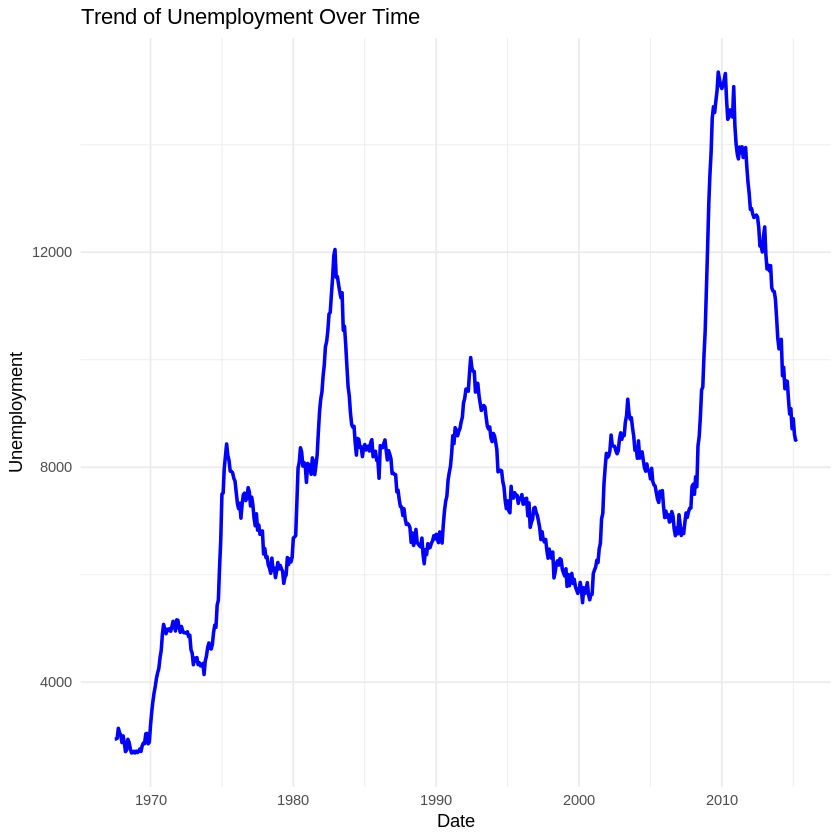

In [7]:
ggplot(data = economics_df, aes(x = date, y = unemploy)) +
  geom_line(color = "blue", linewidth = 1) +
  labs(
    title = "Trend of Unemployment Over Time",
    x = "Date",
    y = "Unemployment"
  ) +
  theme_minimal()

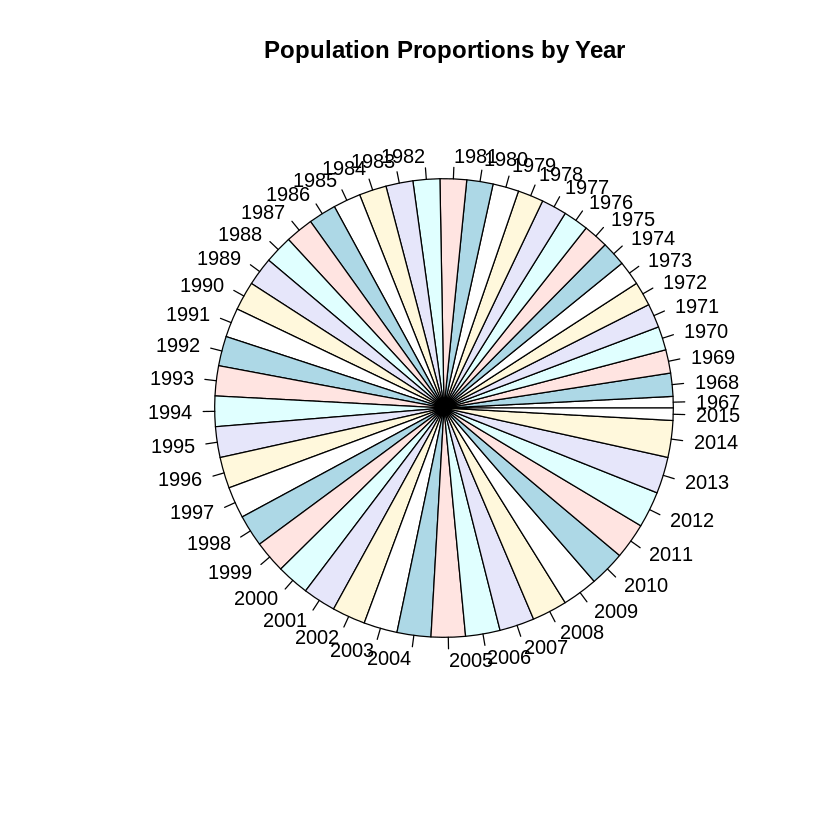

In [8]:
economics_df$year <- as.numeric(format(economics_df$date, "%Y"))
population_by_year <- aggregate(pop ~ year, data = economics_df, FUN = sum)

pie(
  x = population_by_year$pop,
  labels = population_by_year$year,
  main = "Population Proportions by Year",
)

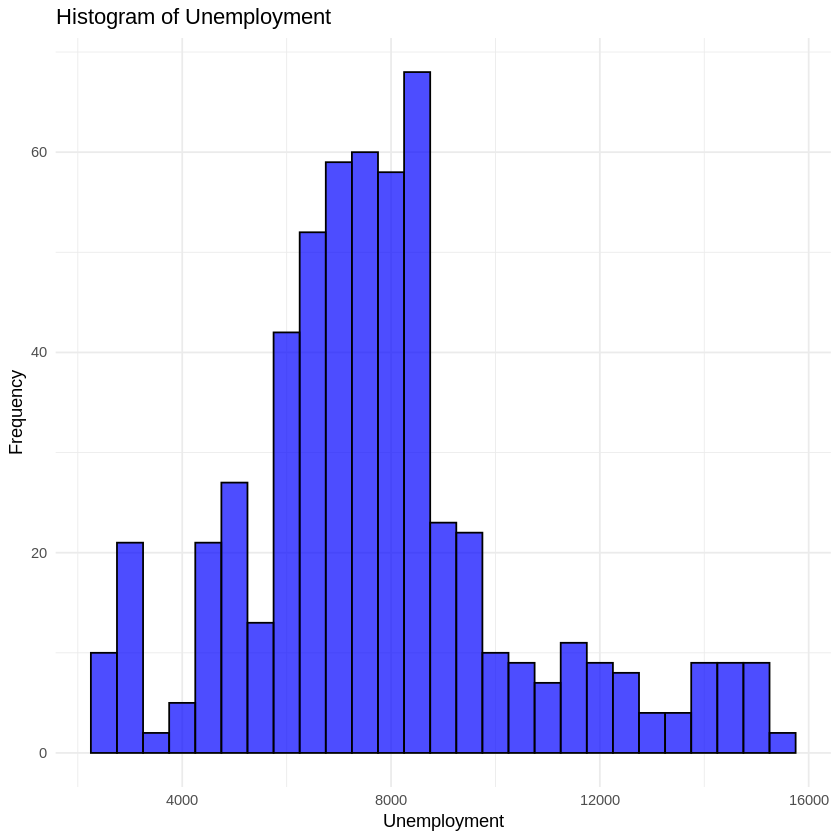

In [9]:
ggplot(data = economics_df, aes(x = unemploy)) +
  geom_histogram(binwidth = 500, fill = "blue", color = "black", alpha = 0.7) +
  labs(
    title = "Histogram of Unemployment",
    x = "Unemployment",
    y = "Frequency"
  ) +
  theme_minimal()

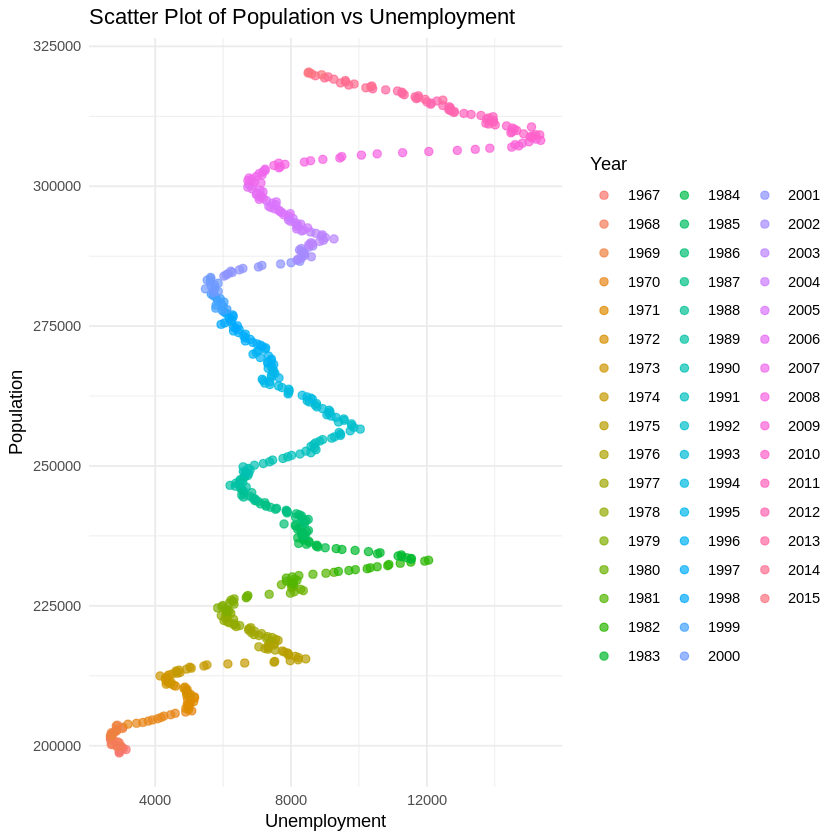

In [10]:
ggplot(data = economics_df, aes(x = unemploy, y = pop, color = factor(year))) +
  geom_point(size = 2, alpha = 0.7) +
  labs(
    title = "Scatter Plot of Population vs Unemployment",
    x = "Unemployment",
    y = "Population",
    color = "Year"
  ) +
  theme_minimal()

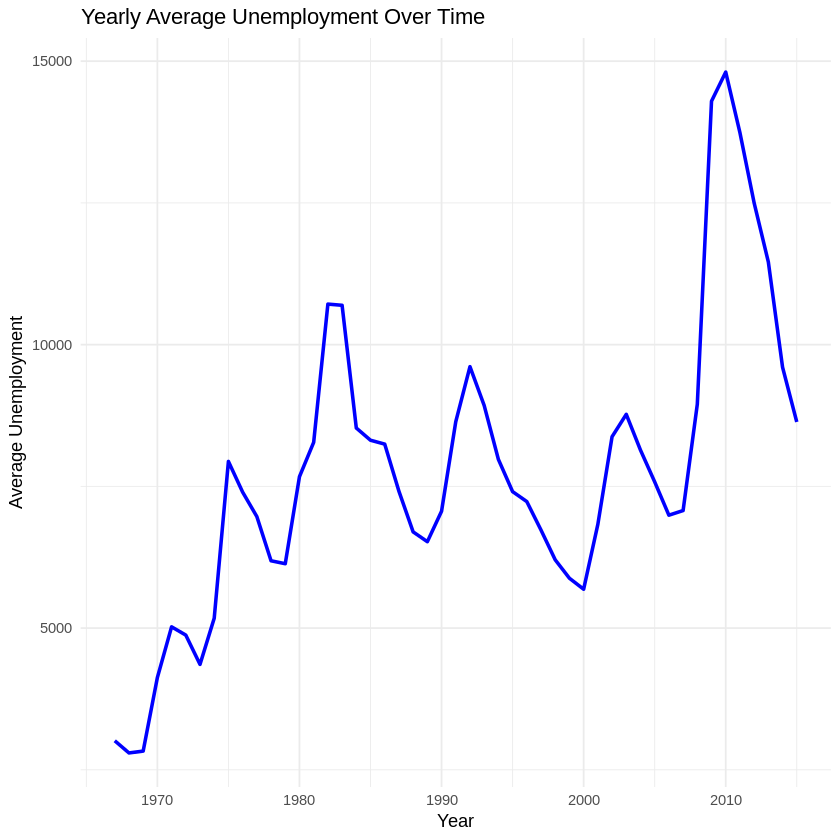

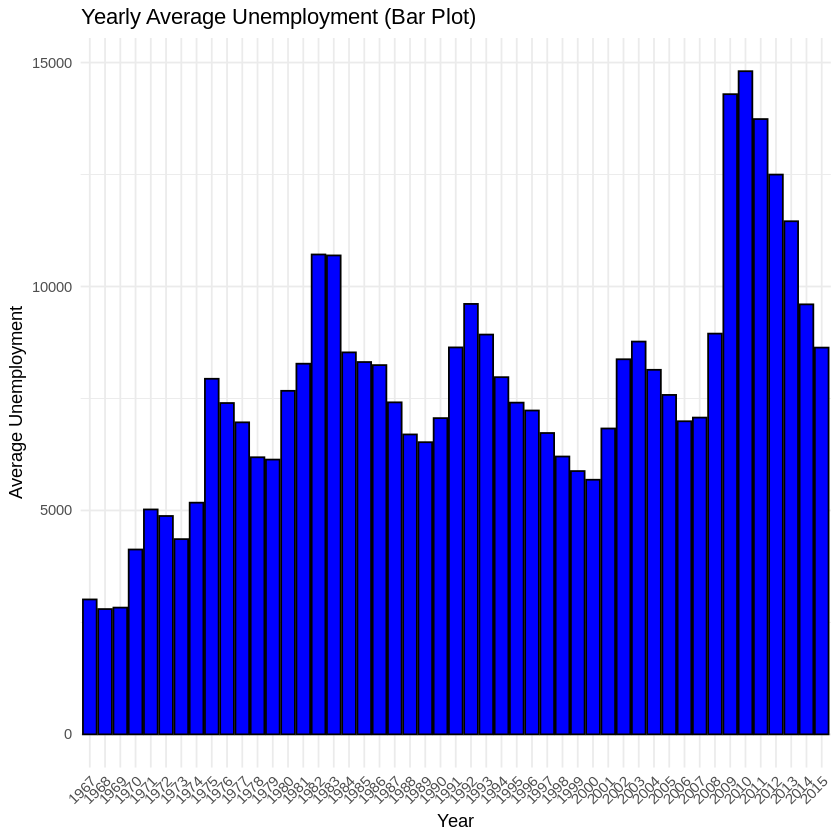

In [11]:
yearly_unemployment <- aggregate(unemploy ~ year, data = economics_df, FUN = mean)

ggplot(data = yearly_unemployment, aes(x = year, y = unemploy)) +
  geom_line(color = "blue", linewidth = 1) +
  labs(
    title = "Yearly Average Unemployment Over Time",
    x = "Year",
    y = "Average Unemployment"
  ) +
  theme_minimal()

ggplot(data = yearly_unemployment, aes(x = factor(year), y = unemploy)) +
  geom_bar(stat = "identity", fill = "blue", color = "black") +
  labs(
    title = "Yearly Average Unemployment (Bar Plot)",
    x = "Year",
    y = "Average Unemployment"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Q2

## One-Sided t-Test

In [16]:
after <- c(115, 118, 122, 119, 121, 116, 114, 123, 117, 120,
           119, 118, 115, 118, 116, 122, 121, 120, 119, 118,
           115, 116, 117, 118, 115, 116, 119, 118, 120, 122)

t_test_result <- t.test(after, mu = 120, alternative = "less")

print(t_test_result)


	One Sample t-test

data:  after
t = -3.935, df = 29, p-value = 0.0002386
alternative hypothesis: true mean is less than 120
95 percent confidence interval:
     -Inf 118.9962
sample estimates:
mean of x 
 118.2333 



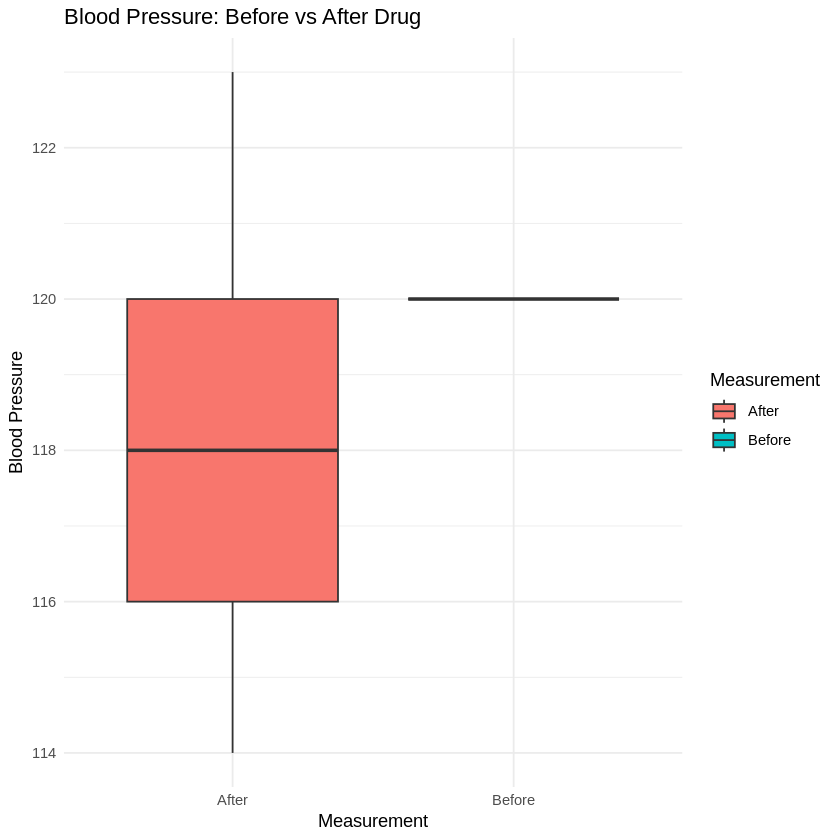

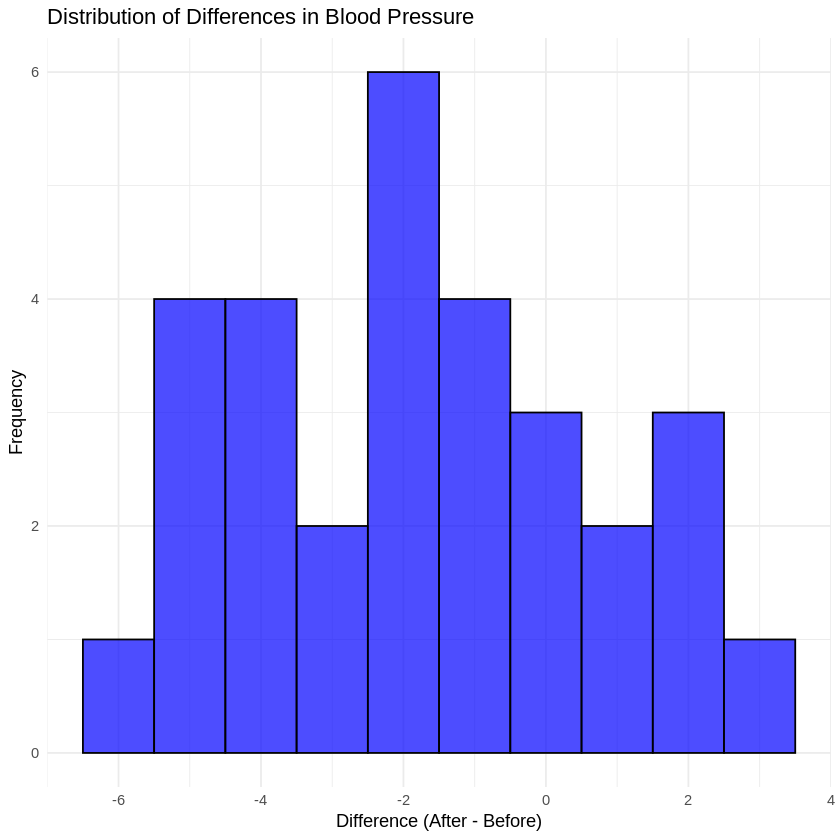

In [18]:
data <- data.frame(
  Measurement = c(rep("Before", length(before)), rep("After", length(after))),
  Blood_Pressure = c(before, after)
)

ggplot(data, aes(x = Measurement, y = Blood_Pressure, fill = Measurement)) +
  geom_boxplot() +
  labs(
    title = "Blood Pressure: Before vs After Drug",
    x = "Measurement",
    y = "Blood Pressure"
  ) +
  theme_minimal()

differences <- after - before
ggplot(data.frame(Differences = differences), aes(x = Differences)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black", alpha = 0.7) +
  labs(
    title = "Distribution of Differences in Blood Pressure",
    x = "Difference (After - Before)",
    y = "Frequency"
  ) +
  theme_minimal()

data_patient <- data.frame(
  Patient = 1:length(after),
  Before = before,
  After = after
)

In [19]:
p_value <- t_test_result$p.value

cat("P-value:", p_value)

P-value: 0.0002386018

### Conclusion

- **Hypotheses**:  
  $ H_0: \mu = 120 $  
  $ H_a: \mu < 120 $  

- **Results**:  
  $ t = -3.935, \ df = 29, \ p = 0.0002386 $  
  $ \bar{x} = 118.23, \ 95\% \, CI = (-\infty, 118.9962) $  

- **Decision**:  
  $ p < 0.05 \ \rightarrow \ \text{Reject } H_0 $  
  $ \rightarrow \ \text{The drug significantly reduces blood pressure (one-sided test).} $  

## Two-Sided t-Test

In [20]:
t_test_two_sided <- t.test(after, mu = 120, alternative = "two.sided")

print(t_test_two_sided)


	One Sample t-test

data:  after
t = -3.935, df = 29, p-value = 0.0004772
alternative hypothesis: true mean is not equal to 120
95 percent confidence interval:
 117.3151 119.1516
sample estimates:
mean of x 
 118.2333 



### Conclusion

- **Hypotheses**:  
  $ H_0: \mu = 120 $  
  $ H_a: \mu \neq 120 $  

- **Results**:  
  $ t = -3.935, \ df = 29, \ p = 0.0004772 $  
  $ \bar{x} = 118.23, \ 95\% \, CI = (117.3151, 119.1516) $  

- **Decision**:  
  $ p < 0.05 \ \rightarrow \ \text{Reject } H_0 $  
  $ \rightarrow \ \text{The drug significantly affects blood pressure (two-sided test).} $  


# Q3

In [21]:
data("quakes")

head(quakes, 10)

,lat,long,depth,mag,stations
,<dbl>,<dbl>,<int>,<dbl>,<int>
1,-20.42,181.62,562,4.8,41
2,-20.62,181.03,650,4.2,15
3,-26.00,184.10,42,5.4,43
4,-17.97,181.66,626,4.1,19
5,-20.42,181.96,649,4.0,11
6,-19.68,184.31,195,4.0,12
7,-11.70,166.10,82,4.8,43
8,-28.11,181.93,194,4.4,15
9,-28.74,181.74,211,4.7,35


In [22]:
correlation <- cor(quakes$mag, quakes$depth)

cat("Correlation between mag and depth:", correlation, "\n")

Correlation between mag and depth: -0.2306377 


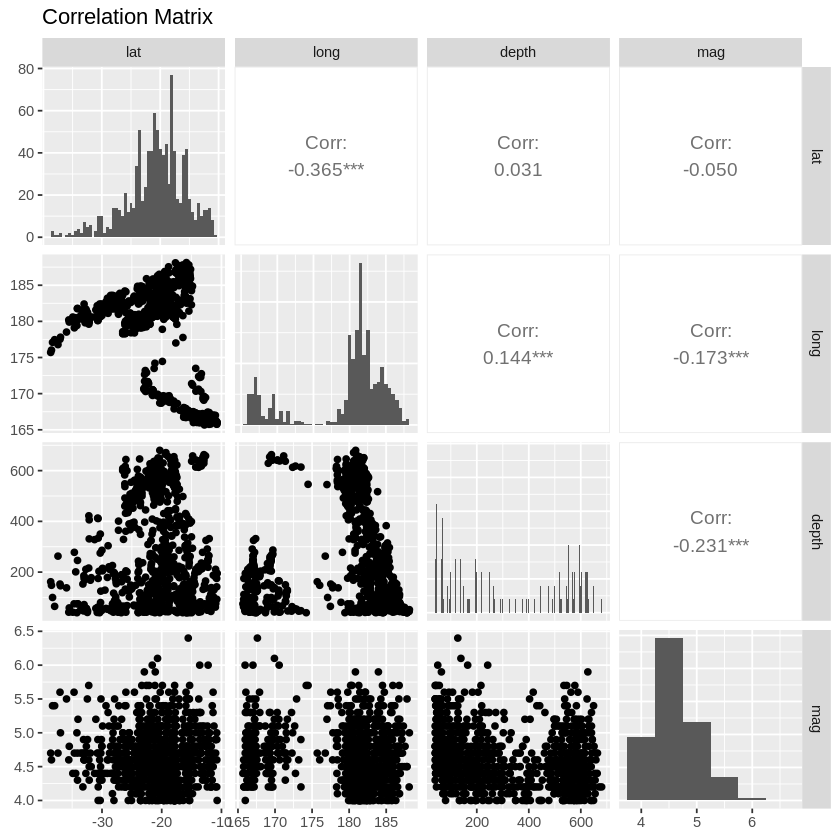

In [35]:
if (!requireNamespace("GGally", quietly = TRUE)) {
  install.packages("GGally")
}

library(GGally)

ggpairs(
  quakes,
  columns = 1:4,
  upper = list(continuous = wrap("cor", size = 4)),
  lower = list(continuous = "points"),
  diag = list(continuous = wrap("barDiag", binwidth = 0.5)),
  title = "Correlation Matrix"
)

Using `ggcorrplot` package:

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape2’




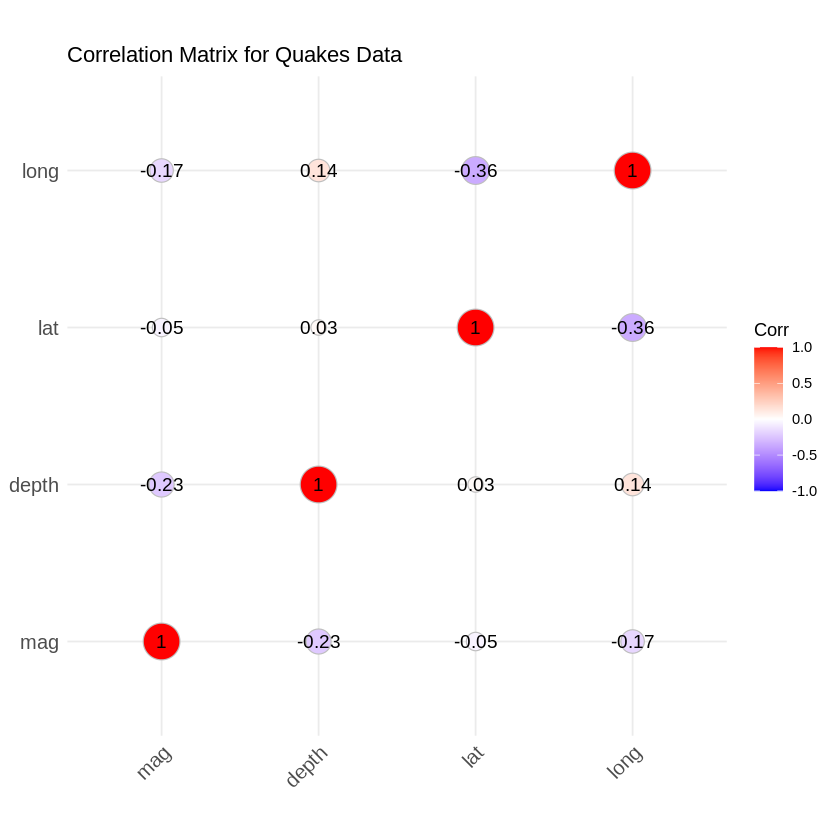

In [24]:
install.packages("ggcorrplot")
library(ggcorrplot)

quakes_subset <- quakes[, c("mag", "depth", "lat", "long")]
cor_matrix <- cor(quakes_subset)

ggcorrplot(cor_matrix, method = "circle", lab = TRUE, title = "Correlation Matrix for Quakes Data")

Using `ggplot2` package:

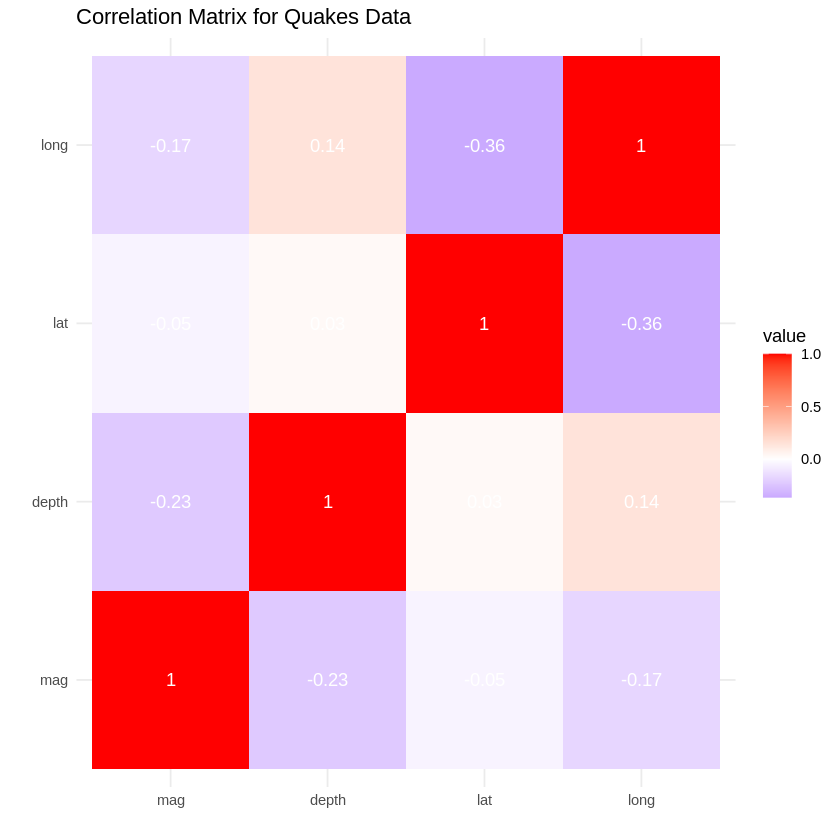

In [27]:
library(ggplot2)
library(reshape2)

quakes_subset <- quakes[, c("mag", "depth", "lat", "long")]

cor_matrix <- cor(quakes_subset)
cor_data <- melt(cor_matrix)

ggplot(data = cor_data, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  geom_text(aes(label = round(value, 2)), color = "white") +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +
  labs(title = "Correlation Matrix for Quakes Data", x = "", y = "") +
  theme_minimal()

In [28]:
cor_data <- cor_data[cor_data$Var1 != cor_data$Var2, ]

sorted_correlations <- cor_data[order(-abs(cor_data$value)), ]

print(sorted_correlations)

    Var1  Var2       value
12  long   lat -0.36454404
15   lat  long -0.36454404
2  depth   mag -0.23063770
5    mag depth -0.23063770
4   long   mag -0.17306726
13   mag  long -0.17306726
8   long depth  0.14444341
14 depth  long  0.14444341
3    lat   mag -0.05046165
9    mag   lat -0.05046165
7    lat depth  0.03102583
10 depth   lat  0.03102583


### Conclusion
The variable with the strongest correlation with `lat` is `long` with a correlation of $-0.3645$.

This can also be seen in the scatter plot, where `lat` and `long` form a line-like pattern.

Other variables show significantly weaker correlations.

In [37]:
correlation_depth_mag <- cor(quakes$depth, quakes$mag)

cor_test <- cor.test(quakes$depth, quakes$mag)

cat("Correlation coefficient:", correlation_depth_mag, "\n")
print(cor_test)

Correlation coefficient: -0.2306377 

	Pearson's product-moment correlation

data:  quakes$depth and quakes$mag
t = -7.488, df = 998, p-value = 1.535e-13
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2885057 -0.1710909
sample estimates:
       cor 
-0.2306377 



### Conclusion

- **Hypotheses**:  
  $ H_0: \rho = 0 $ (No correlation between depth and magnitude)  
  $ H_a: \rho \neq 0 $ (There is a correlation between depth and magnitude)  

- **Results**:  
  $ t = -7.488, \ df = 998, \ p = 1.535 \times 10^{-13} $  
  $ r = -0.2306, \ 95\% \, CI = (-0.2885, -0.1711) $  

- **Decision**:  
  $ p < 0.05 \ \rightarrow \ \text{Reject } H_0 $  
  $ \rightarrow \ \text{There is a weak but statistically significant inverse correlation between depth and magnitude.} $  


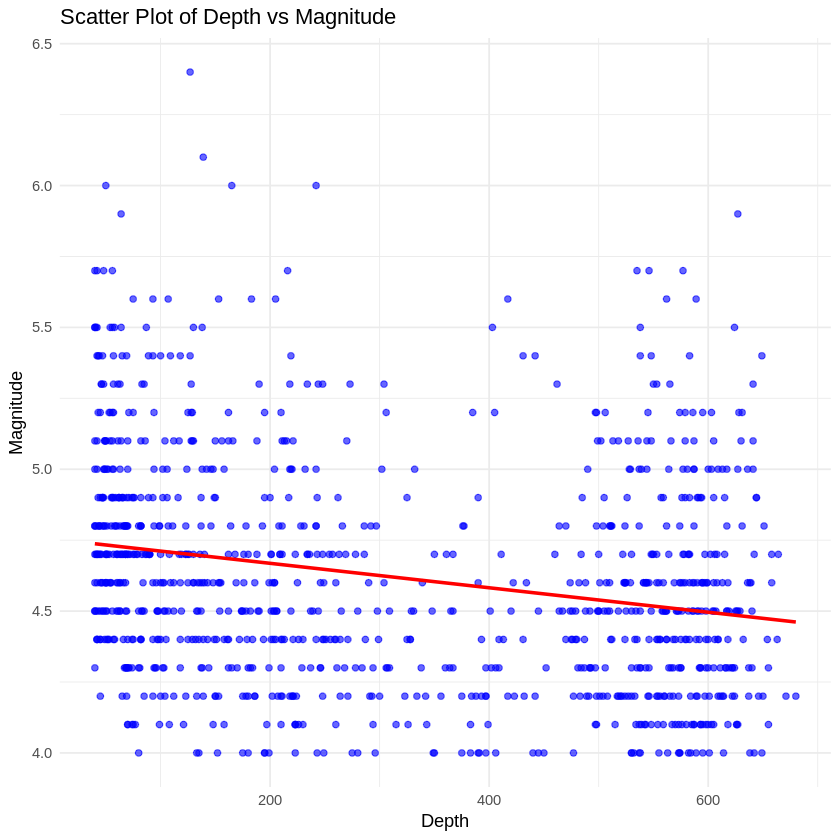

In [39]:
ggplot(quakes, aes(x = depth, y = mag)) +
  geom_point(alpha = 0.6, color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, color = "red", se = FALSE) +
  labs(
    title = "Scatter Plot of Depth vs Magnitude",
    x = "Depth",
    y = "Magnitude"
  ) +
  theme_minimal()

### Conclusion
There is a `weak negative relationship` between `depth` and `mag`. As depth increases, the magnitude shows a slight decrease.

$ \rightarrow $ the relationship between depth and magnitude is not very strong